# Análisis Exploratorio de Datos (EDA): Trastornos Depresivos y Factores Socioeconómicos (1992-2017)

## Introducción

Este notebook presenta un análisis exploratorio de datos (EDA) sobre la relación entre los trastornos depresivos y diversos factores socioeconómicos, como el desempleo, el acceso a la sanidad y la tasa de suicidios, a nivel global entre 1992 y 2017. Se emplean herramientas como `pandas`, `numpy`, `matplotlib` y `seaborn` para la manipulación, análisis y visualización de datos, con el objetivo de detectar patrones y contrastar hipótesis previamente formuladas.

El estudio se basa en datos obtenidos de Kaggle y HumanProgress, los cuales han sido limpiados y estructurados para garantizar su coherencia. A través de este análisis, se busca proporcionar información relevante sobre cómo los factores socioeconómicos pueden influir en la salud mental a nivel global.

A continuación, se detallan los objetivos del análisis, la metodología utilizada y los resultados obtenidos.


PRIMERO DE TODO, IMPORTAR TODAS LAS LIBRERIAS Y MÓDULOS QUE VAYA A USAR

In [411]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

EMPIEZO CON EL DATASET DE SUICIDIOS, LIMPIANDOLO Y PREPARANDOLO

In [412]:
suicidios = pd.read_csv(".\datos\Datos suicidio.csv")

In [413]:
suicidios.info()
suicidios.head()
suicidios.drop(columns="Unnamed: 29",inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  228 non-null    object 
 1    1990         226 non-null    float64
 2   1991          226 non-null    float64
 3   1992          226 non-null    float64
 4   1993          226 non-null    float64
 5   1994          226 non-null    float64
 6   1995          226 non-null    float64
 7   1996          226 non-null    float64
 8   1997          226 non-null    float64
 9   1998          226 non-null    float64
 10  1999          226 non-null    float64
 11  2000          226 non-null    float64
 12  2001          226 non-null    float64
 13  2002          226 non-null    float64
 14  2003          226 non-null    float64
 15  2004          226 non-null    float64
 16  2005          226 non-null    float64
 17  2006          226 non-null    float64
 18  2007          226 non-null    

In [414]:
suicidios.dropna(thresh=20,inplace=True)

In [415]:
for columna in suicidios.columns:
    columna.strip()
    suicidios.rename(columns= {columna : columna.strip()},inplace = True)


In [416]:
suicidios.rename(columns= {"country_name": "Country"},inplace = True)


In [417]:
poblacion = pd.read_csv(".\datos\Poblacion.csv")
continentes = pd.read_csv(".\datos\countries_continents.csv")
df_cont = pd.merge(suicidios,continentes,on= "Country",how = "outer")
suicidios_final = pd.merge(df_cont,poblacion,on="Country",how= "outer")

In [418]:
suicidios_final.dropna(axis = 0,thresh=30,inplace=True)

In [419]:
suicidios_final.drop(columns="1990",inplace=True)

In [420]:
suicidios_long = suicidios_final.melt(id_vars=['Country', 'Continent', 'Population'],var_name='año',value_name='suicidios')

LIMPIO EL DATASET DE DESEMPLEO Y LE AÑADO LO PERTINENTE PARA UNIRLOS

In [421]:
desempleo= pd.read_csv(".\datos\desempleo.csv")

In [422]:
desempleo.drop(columns={"Unnamed: 33"},inplace=True)

In [423]:
desempleo.drop(axis=1,columns={"2018","2019","2020","2021","2022"},inplace=True)

In [424]:
desempleo.dropna(how="all",inplace=True)
desempleo.rename(columns={"country_name":"Country"},inplace=True)

In [425]:
poblacion = pd.read_csv(".\datos\Poblacion.csv")
continentes = pd.read_csv(".\datos\countries_continents.csv")
df_cont = pd.merge(desempleo,continentes,on= "Country",how = "outer")
desempleo_final = pd.merge(df_cont,poblacion,on="Country",how= "outer")

In [426]:
desempleo_final.dropna(axis=0,thresh=30,inplace=True)

In [427]:
desempleo_long = desempleo_final.melt(id_vars=['Country', 'Continent'],var_name='año',value_name='desempleo')

UNO LOS DATASET DE SUICIDIOS Y EL DE DESEMPLEO

In [428]:
suicidio_desempleo = pd.merge(suicidios_long,desempleo_long,how="inner",on=["Country","Continent","año"])

LIMPIO Y PREPARO EL DATASET DE ACCESO A LA SANIDAD PARA UNIRLO TAMBIÉN

In [429]:
sanidad = pd.read_csv(".\datos\sanidad.csv")

In [430]:
sanidad.head()
sanidad.columns
sanidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  228 non-null    object 
 1    1990         226 non-null    float64
 2   1991          226 non-null    object 
 3   1992          226 non-null    object 
 4   1993          226 non-null    object 
 5   1994          226 non-null    object 
 6   1995          226 non-null    float64
 7   1996          226 non-null    object 
 8   1997          226 non-null    object 
 9   1998          226 non-null    object 
 10  1999          226 non-null    object 
 11  2000          226 non-null    float64
 12  2001          226 non-null    object 
 13  2002          226 non-null    object 
 14  2003          226 non-null    object 
 15  2004          226 non-null    object 
 16  2005          226 non-null    float64
 17  2006          226 non-null    object 
 18  2007          226 non-null    

In [431]:
for columna in sanidad.columns:
    columna.strip()
    sanidad.rename(columns= {columna : columna.strip()},inplace = True)

In [432]:
sanidad.drop(columns={"1990","Unnamed: 27"},inplace=True)

In [433]:
for columna in sanidad.select_dtypes(include=['object']).columns:
    sanidad[columna] = sanidad[columna].str.replace('*', '', regex=False) 

In [434]:
sanidad.rename(columns={"country_name":"Country"},inplace=True)

In [435]:
df_cont = pd.merge(sanidad,continentes,on= "Country",how = "outer")
sanidad_final = pd.merge(df_cont,poblacion,on="Country",how= "outer")

In [436]:
sanidad_final.dropna(thresh=28,inplace=True)

In [437]:
sanidad_final[["1996","1997","1998","1999","2001","2002","2003","2004","2006","2007","2008","2009","2011","2012","2013","2014"]] = sanidad_final[["1996","1997","1998","1999","2001","2002","2003","2004","2006","2007","2008","2009","2011","2012","2013","2014"]].astype(float)

In [438]:
sanidad_long = sanidad_final.melt(id_vars=['Country', 'Continent'],var_name='año',value_name='sanidad')

UNO EL DATASET SANIDAD A LA UNIÓN DE LOS OTROS DOS

In [439]:
suicidio_desempleo_sanidad = pd.merge(suicidio_desempleo,sanidad_long,how="inner",on=["Country","Continent","año"])

LIMPIO Y PREPARO EL DATASET DE WORLD HAPPINESS REPORT

In [440]:
felicidad = pd.read_csv(".\datos\World Happiness Report.csv")

In [441]:
felicidad = felicidad[["Country Name","Year","Social Support","Freedom To Make Life Choices"]]

In [442]:
felicidad.rename(columns={"Country Name":"Country"},inplace=True)

In [443]:
felicidad.info()
felicidad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2199 non-null   object 
 1   Year                          2199 non-null   int64  
 2   Social Support                2186 non-null   float64
 3   Freedom To Make Life Choices  2166 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 68.8+ KB


,Country,Year,Social Support,Freedom To Make Life Choices
0,Afghanistan,2008,0.450662,0.718114
1,Afghanistan,2009,0.552308,0.678896
2,Afghanistan,2010,0.539075,0.600127
3,Afghanistan,2011,0.521104,0.495901
4,Afghanistan,2012,0.520637,0.530935


In [444]:
felicidad_ordenada = felicidad.pivot_table(index=['Country', 'Year'],values=['Social Support', 'Freedom To Make Life Choices'],aggfunc='mean')


LIMPIO Y PREPARO EL DATASET DE PREVALENCIA DE LA DEPRESIÓN

In [445]:
depresion = pd.read_csv(".\datos\depresion.csv")

In [446]:
for columna in depresion.columns:
    columna.strip()
    depresion.rename(columns= {columna : columna.strip()},inplace = True)

In [447]:
depresion.drop(columns={"1990",'Unnamed: 28'},inplace=True)

In [448]:
depresion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  233 non-null    object 
 1   1991          232 non-null    float64
 2   1992          232 non-null    float64
 3   1993          232 non-null    float64
 4   1994          232 non-null    float64
 5   1995          232 non-null    float64
 6   1996          232 non-null    float64
 7   1997          232 non-null    float64
 8   1998          232 non-null    float64
 9   1999          232 non-null    float64
 10  2000          232 non-null    float64
 11  2001          232 non-null    float64
 12  2002          232 non-null    float64
 13  2003          232 non-null    float64
 14  2004          232 non-null    float64
 15  2005          232 non-null    float64
 16  2006          232 non-null    float64
 17  2007          232 non-null    float64
 18  2008          232 non-null    

In [449]:
depresion.rename(columns={"country_name":"Country"},inplace=True)

In [450]:
depresion.dropna(thresh=20,inplace=True)

In [451]:
df_cont = pd.merge(depresion,continentes,on= "Country",how = "outer")
depresion_final = pd.merge(df_cont,poblacion,on="Country",how= "outer")

In [452]:
depresion_final.dropna(thresh=28,inplace=True)

In [453]:
depresion_long = depresion_final.melt(id_vars=['Country', 'Continent'],var_name='año',value_name='depresion')

UNO LA ÚLTIMA VARIABLE A EL DATASET CON LAS VARIABLES SUICIDIOS SANIDAD Y DESEMPLEO

In [454]:
variables = pd.merge(suicidio_desempleo_sanidad,depresion_long,how="inner",on=["Country","Continent","año"])

In [455]:
variables["sanidad"] = variables["sanidad"].astype(float)

YA TENGO LOS DOS DATA SETS CON LOS QUE VOY A TRABAJAR LIMPIOS: VARIABLES Y WORLD HAPPINESS REPORT

In [456]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4248 non-null   object 
 1   Continent   4248 non-null   object 
 2   Population  4248 non-null   float64
 3   año         4248 non-null   object 
 4   suicidios   4248 non-null   float64
 5   desempleo   4248 non-null   float64
 6   sanidad     4248 non-null   float64
 7   depresion   4248 non-null   float64
dtypes: float64(5), object(3)
memory usage: 265.6+ KB


In [457]:
felicidad_ordenada.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2193 entries, ('Afghanistan', np.int64(2008)) to ('Zimbabwe', np.int64(2022))
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Freedom To Make Life Choices  2166 non-null   float64
 1   Social Support                2186 non-null   float64
dtypes: float64(2)
memory usage: 46.3+ KB


ESTADÍSTICOS Y GRÁFICOS:

HIPÓTESIS 1 : Los diagnósticos de depresión han ido aumentado progresivamente a nivel global desde la década de 1990

In [458]:
variables.groupby(["Continent","año"])[["depresion"]].mean()

depresion
Continent     año            
Africa        1992   3.064235
              1993   3.069333
              1994   3.077510
              1995   3.092020
              1996   3.095176
...                       ...
South America 2011   3.463417
              2012   3.479000
              2013   3.495000
              2014   3.513333
              2015   3.529917

[168 rows x 1 columns]

Esto me proporciona una media por continente con los valores de los paises pero sin tener en cuenta la poblacion de cada uno. Utilizaré otro método para obtener una media relativa

In [459]:
variables["personas depresion"] = (variables["depresion"]*variables["Population"]/100)
variables["total personas continente"]=variables.groupby(["año","Continent"])["Population"].transform("sum")
variables["peso_ponderacion"] = variables["Population"]/variables["total personas continente"] 
variables["depresion ponderada"] = variables["personas depresion"]*variables["peso_ponderacion"]
variables["porcentaje depresion"] = (variables.groupby(["año","Continent"])["personas depresion"].transform("sum")/variables["total personas continente"])*100

In [460]:
variables.groupby(["año","Continent"])["Population"].transform("sum")

0       4.575571e+09
1       5.938391e+08
2       1.348805e+09
3       1.348805e+09
4       4.332222e+08
            ...     
4243    4.575571e+09
4244    6.073826e+08
4245    4.575571e+09
4246    1.348805e+09
4247    1.348805e+09
Name: Population, Length: 4248, dtype: float64

In [461]:
años = ["1992","1995","2000","2005","2010","2015"]
porcentajes_por_años = variables[variables["año"].isin(años)][["porcentaje depresion","Continent","año"]]
resultados = porcentajes_por_años.groupby(["Continent","año"])["porcentaje depresion"].mean()

In [462]:
resultados = pd.DataFrame(resultados)
resultados

porcentaje depresion
Continent     año                       
Africa        1992              3.092726
              1995              3.116611
              2000              3.167933
              2005              3.183837
              2010              3.196640
              2015              3.198226
Asia          1992              3.178740
              1995              3.234092
              2000              3.348817
              2005              3.511057
              2010              3.585956
              2015              3.696958
Australia     1992              4.388288
              1995              4.480230
              2000              4.482826
              2005              4.608488
              2010              4.586876
              2015              4.517985
Europe        1992              4.503366
              1995              4.499122
              2000              4.501684
              2005              4.478575
              2010              4.519870
              2015              4.522966
Europe/Asia   1992              4.125233
              1995              4.240131
              2000              4.390347
              2005              4.448885
              2010              4.392574
              2015              4.427046
North America 1992              4.215517
              1995              4.244367
              2000              4.404154
              2005              4.432546
              2010              4.376031
              2015              4.422848
South America 1992              3.098492
              1995              3.174157
              2000              3.602922
              2005              3.723705
              2010              3.447097
              2015              3.449449

In [463]:
tabla_depresion = resultados.pivot_table(index="Continent",columns="año",values="porcentaje depresion")
tabla_depresion

año,1992,1995,2000,2005,2010,2015
Continent,,,,,,
Africa,3.092726,3.116611,3.167933,3.183837,3.196640,3.198226
Asia,3.178740,3.234092,3.348817,3.511057,3.585956,3.696958
Australia,4.388288,4.480230,4.482826,4.608488,4.586876,4.517985
Europe,4.503366,4.499122,4.501684,4.478575,4.519870,4.522966
Europe/Asia,4.125233,4.240131,4.390347,4.448885,4.392574,4.427046
North America,4.215517,4.244367,4.404154,4.432546,4.376031,4.422848
South America,3.098492,3.174157,3.602922,3.723705,3.447097,3.449449


In [464]:
tabla_larga = tabla_depresion.reset_index().melt(id_vars="Continent", var_name="Año",value_name="Porcentaje depresion")
tabla_larga

,Continent,Año,Porcentaje depresion
0,Africa,1992,3.092726
1,Asia,1992,3.178740
2,Australia,1992,4.388288
3,Europe,1992,4.503366
4,Europe/Asia,1992,4.125233
5,North America,1992,4.215517
6,South America,1992,3.098492
7,Africa,1995,3.116611
8,Asia,1995,3.234092
9,Australia,1995,4.480230


TABLA HIPÓTESIS 1, CONTINENTES CON MÁS PREVALENCIA

(4.1, 4.65)

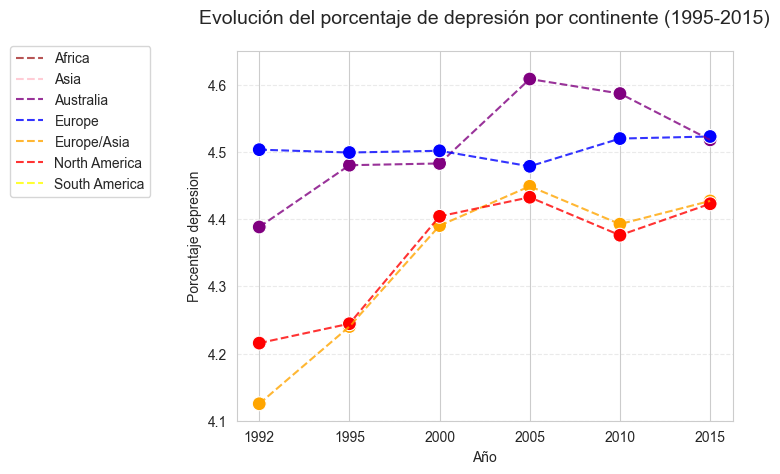

In [465]:
lista_colores =["Brown","Pink","Purple","Blue","orange","Red","yellow"]
sns.scatterplot(data = tabla_larga,x = "Año",y = "Porcentaje depresion",hue = "Continent", palette = lista_colores,legend=False, markers = ["o","s","D","^","v","p","*"], s = 100)
sns.lineplot(data = tabla_larga,x = "Año",y = "Porcentaje depresion",hue = "Continent", palette = lista_colores,linestyle="--",linewidth = 1.5,alpha =0.8)
plt.legend(bbox_to_anchor=(-0.16,1.033))
plt.title("Evolución del porcentaje de depresión por continente (1995-2015)",fontsize = 14, pad = 20)
plt.grid(axis ="y", linestyle= '--',alpha = 0.4)
plt. ylim(4.1,4.65)


TABLA HIPÓTESIS 1, CONTINENTES MENOS PREVALENCIA

(3.05, 3.75)

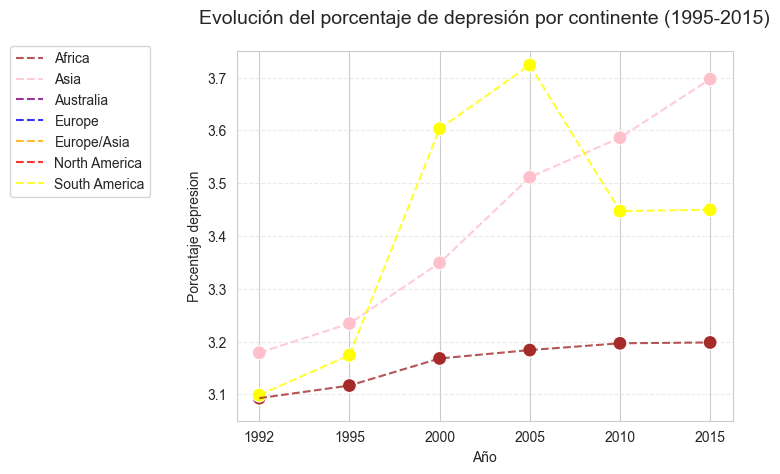

In [466]:
lista_colores =["Brown","Pink","Purple","Blue","orange","Red","yellow"]
sns.scatterplot(data = tabla_larga,x = "Año",y = "Porcentaje depresion",hue = "Continent", palette = lista_colores,legend=False, markers = ["o","s","D","^","v","p","*"], s = 100)
sns.lineplot(data = tabla_larga,x = "Año",y = "Porcentaje depresion",hue = "Continent", palette = lista_colores,linestyle="--",linewidth = 1.5,alpha =0.8)
plt.legend(bbox_to_anchor=(-0.16,1.033))
plt.title("Evolución del porcentaje de depresión por continente (1995-2015)",fontsize = 14, pad = 20)
plt.grid(axis ="y", linestyle= '--',alpha = 0.4)
plt.ylim(3.05,3.75)

HIPÓTESIS 2: Los países con tasas más altas de trastornos depresivos serán también los países con los datos más altos de suicidio. 

In [467]:
variables["suicidios totales"] = (variables["Population"]/100000)*variables["suicidios"]
variables

,Country,Continent,Population,año,suicidios,desempleo,sanidad,depresion,personas depresion,total personas continente,peso_ponderacion,depresion ponderada,porcentaje depresion,suicidios totales
0,Afghanistan,Asia,38928341.0,1992,6.979,7.940,24.62,3.190,1.241814e+06,4.575571e+09,0.008508,10565.186302,3.178740,2716.808918
1,Albania,Europe,2877797.0,1992,3.767,30.007,63.48,2.075,5.971429e+04,5.938391e+08,0.004846,289.380740,4.503366,108.406613
2,Algeria,Africa,43851044.0,1992,4.106,24.380,49.96,3.110,1.363767e+06,1.348805e+09,0.032511,44337.494663,3.092726,1800.523867
3,Angola,Africa,32866272.0,1992,8.817,16.621,26.72,3.310,1.087874e+06,1.348805e+09,0.024367,26508.171356,3.092726,2897.819202
4,Argentina,South America,45376763.0,1992,10.684,6.360,58.56,3.681,1.670319e+06,4.332222e+08,0.104742,174953.300374,3.098492,4848.053359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,Vietnam,Asia,97338583.0,2015,7.675,1.849,66.30,3.183,3.098287e+06,4.575571e+09,0.021274,65911.525433,3.696958,7470.736245
4244,Virgin Islands (U.S.),North America,104000.0,2015,8.707,12.146,70.20,3.990,4.149600e+03,6.073826e+08,0.000171,0.710521,4.422848,9.055280
4245,Yemen,Asia,29825964.0,2015,4.709,17.900,49.60,3.340,9.961872e+05,4.575571e+09,0.006519,6493.668740,3.696958,1404.504645
4246,Zambia,Africa,18383955.0,2015,6.563,8.316,41.60,2.711,4.983890e+05,1.348805e+09,0.013630,6792.948146,3.198226,1206.538967


In [468]:
variables.groupby(["año"])[["depresion"]].idxmax()

,depresion
año,
1992,53
1993,230
1994,407
1995,584
1996,761
1997,938
1998,1115
1999,1292
2000,1469


In [469]:
suicidios_depresion = variables[variables["año"].isin(años)][["depresion","Country","año","suicidios"]]
suicidios_depresion

,depresion,Country,año,suicidios
0,3.190,Afghanistan,1992,6.979
1,2.075,Albania,1992,3.767
2,3.110,Algeria,1992,4.106
3,3.310,Angola,1992,8.817
4,3.681,Argentina,1992,10.684
...,...,...,...,...
4243,3.183,Vietnam,2015,7.675
4244,3.990,Virgin Islands (U.S.),2015,8.707
4245,3.340,Yemen,2015,4.709
4246,2.711,Zambia,2015,6.563


In [470]:
tabla_relacion_suicidios_depresion = suicidios_depresion.groupby(["Country","año"])[["depresion","suicidios"]].mean()

In [471]:
tablasd = tabla_relacion_suicidios_depresion.pivot_table(index="Country",columns="año",values=["depresion","suicidios"])
tablasd

depresion                                    suicidios  \
año                        1992   1995   2000   2005   2010   2015      1992   
Country                                                                        
Afghanistan               3.190  3.236  3.196  3.212  3.206  3.296     6.979   
Albania                   2.075  2.114  2.236  2.415  2.565  2.710     3.767   
Algeria                   3.110  3.158  3.281  3.468  3.592  3.740     4.106   
Angola                    3.310  3.334  3.299  3.255  3.229  3.212     8.817   
Argentina                 3.681  3.748  3.820  3.841  3.842  3.875    10.684   
...                         ...    ...    ...    ...    ...    ...       ...   
Vietnam                   2.584  2.632  2.740  2.893  3.058  3.183     7.578   
Virgin Islands (U.S.)     3.264  3.371  3.481  3.701  3.880  3.990     6.252   
Yemen                     3.010  3.059  3.064  3.161  3.259  3.340     4.612   
Zambia                    2.681  2.716  2.655  2.652  2.617  2.711     8.723   
Zimbabwe                  2.333  2.382  2.366  2.393  2.391  2.447    10.088   

                                                               
año                      1995    2000    2005    2010    2015  
Country                                                        
Afghanistan             6.766   6.536   6.008   5.542   5.289  
Albania                 3.743   4.706   5.733   5.717   5.887  
Algeria                 4.491   4.947   4.894   4.591   4.392  
Angola                  8.982   8.322   7.505   6.741   6.242  
Argentina              11.541  12.498  11.256  11.343  11.255  
...                       ...     ...     ...     ...     ...  
Vietnam                 7.624   7.396   7.500   7.541   7.675  
Virgin Islands (U.S.)   6.426   6.848   6.881   7.736   8.707  
Yemen                   4.839   4.952   4.900   4.762   4.709  
Zambia                  9.364   8.213   6.851   6.542   6.563  
Zimbabwe               12.687  19.407  23.406  21.334  18.222  

[177 rows x 12 columns]

In [472]:
media_mundial_suicidios_2015 = tablasd[("suicidios","2015")].mean()
media_mundial_suicidios_1995 = tablasd[("suicidios","1995")].mean()

In [473]:
top3_paises_depresion_2015 = tablasd[("depresion","2015")].nlargest(3)

In [474]:
top3_paises_depresion_suicidios_2015 = tablasd.loc[tablasd[("depresion","2015")].nlargest(3).index,("suicidios","2015")]

GRÁFICO PARA VER RELACION SUICIDIOS VS DEPRESIÓN 1995


In [475]:
top3_paises_depresion_1995 = tablasd[("depresion","1995")].nlargest(15)
top3_paises_depresion_1995

Country
Finland          6.256
Sweden           5.659
Ukraine          5.566
Portugal         5.564
Estonia          5.535
United States    5.299
Australia        5.240
Lithuania        5.144
France           5.042
New Zealand      4.986
Morocco          4.945
Cuba             4.903
Netherlands      4.900
Latvia           4.894
Switzerland      4.862
Name: (depresion, 1995), dtype: float64

In [476]:
top3_paises_depresion_suicidios_1995 = tablasd.loc[tablasd[("depresion","1995")].nlargest(15).index,("suicidios","1995")]

In [477]:
top3_paises_depresion_suicidios_1995.index

Index(['Finland', 'Sweden', 'Ukraine', 'Portugal', 'Estonia', 'United States',
       'Australia', 'Lithuania', 'France', 'New Zealand', 'Morocco', 'Cuba',
       'Netherlands', 'Latvia', 'Switzerland'],
      dtype='object', name='Country')

In [478]:
top3_paises_depresion_suicidios_1995.values

array([27.772, 19.439, 37.099, 14.671, 44.302, 13.384, 14.057, 50.172,
       24.329, 15.249,  7.345, 20.829, 12.346, 45.047, 23.23 ])

In [479]:
data_top_1995 = pd.DataFrame({"Pais":top3_paises_depresion_suicidios_1995.index,"Depresion":top3_paises_depresion_1995.values,"Suicidios":top3_paises_depresion_suicidios_1995.values})
data_top_1995

,Pais,Depresion,Suicidios
0,Finland,6.256,27.772
1,Sweden,5.659,19.439
2,Ukraine,5.566,37.099
3,Portugal,5.564,14.671
4,Estonia,5.535,44.302
5,United States,5.299,13.384
6,Australia,5.240,14.057
7,Lithuania,5.144,50.172
8,France,5.042,24.329
9,New Zealand,4.986,15.249


Text(0.5, 1.0, 'Prevalencia depresión vs suicidios (top 15 países 1995)')

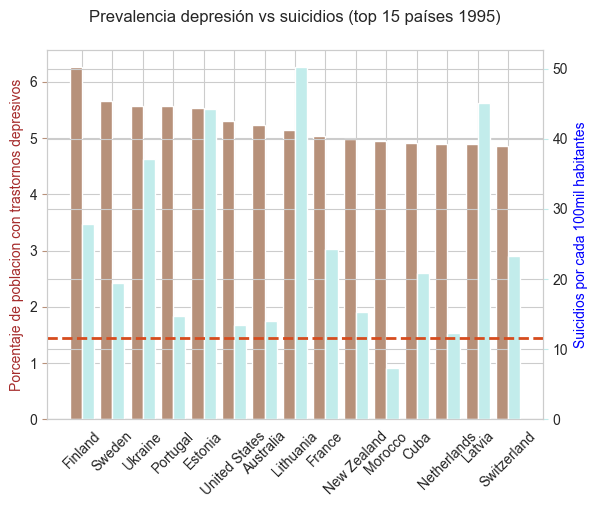

In [480]:
fig,ax1 = plt.subplots()
ax1.bar(x = np.arange(len(data_top_1995)) -0.2,height = data_top_1995["Depresion"],data= data_top_1995,width=0.4,color ="#b7917a",label= "puntuacion depresion")
ax1.set_ylabel("Porcentaje de poblacion con trastornos depresivos",color = "brown")
ax1.tick_params(axis="y",color="#b7917a")
ax1.set_xticks(np.arange(len(data_top_1995)))
ax1.set_xticklabels(data_top_1995["Pais"], rotation = 45)
ax2 = ax1.twinx() #Encontrado en internet,para compartir ejex pero cambiar el y
ax2.bar(x=np.arange(len(data_top_1995))+0.2,height = data_top_1995["Suicidios"],data= data_top_1995,width=0.4,color ="#c2eceb",label = "Suicidios por cada 100mil habitantes")
ax2.set_ylabel("Suicidios por cada 100mil habitantes",color = "b")
ax2.tick_params(axis="y",color="#c2eceb")
ax2.axhline(y=media_mundial_suicidios_1995,color ="#d64c1e",linestyle = "--",linewidth= 2,label ="Media mundial suicidios 1995")
plt.title("Prevalencia depresión vs suicidios (top 15 países 1995)",pad = 20)


AHORA CON EL TOP 3 PAISES CON MENOS PREVALENCIA 

In [481]:
Low3_paises_depresion_1995 = tablasd[("depresion","1995")].nsmallest(15)
tablasd[("depresion","1995")].nsmallest(15)

Country
Myanmar (Burma)    1.977
Honduras           2.073
Albania            2.114
Tajikistan         2.118
Peru               2.184
Colombia           2.193
Laos               2.217
Philippines        2.302
Indonesia          2.355
Mexico             2.364
Azerbaijan         2.365
Mali               2.367
Nicaragua          2.376
Zimbabwe           2.382
Tonga              2.447
Name: (depresion, 1995), dtype: float64

In [482]:
Low3_paises_depresion_suicidios_1995 = tablasd.loc[tablasd[("depresion","1995")].nsmallest(15).index,("suicidios","1995")]

In [483]:
data_low_1995 = pd.DataFrame({"Pais":Low3_paises_depresion_suicidios_1995.index,"Depresion":Low3_paises_depresion_1995.values,"Suicidios":Low3_paises_depresion_suicidios_1995.values})

Text(0.5, 1.0, 'Prevalencia depresión vs suicidios (Bottom 15 países 1995)')

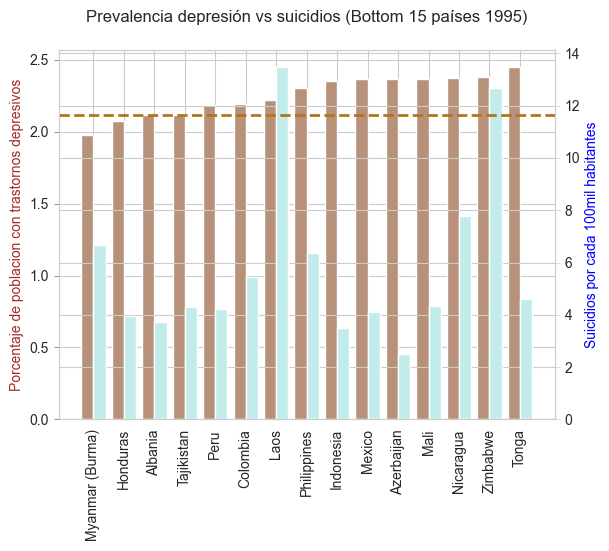

In [484]:
fig,ax1 = plt.subplots()
ax1.bar(x = np.arange(len(data_low_1995)) -0.2,height = data_low_1995["Depresion"],data= data_low_1995,width=0.4,color ="#b7917a",label= "puntuacion depresion")
ax1.set_ylabel("Porcentaje de poblacion con trastornos depresivos",color = "brown")
ax1.tick_params(axis="y",color="#b7917a")
ax1.set_xticks(np.arange(len(data_low_1995)))
ax1.set_xticklabels(data_low_1995["Pais"], rotation = 90)
ax2 = ax1.twinx() #Encontrado en internet,para compartir ejex pero cambiar el y
ax2.bar(x=np.arange(len(data_low_1995))+0.2,height = data_low_1995["Suicidios"],data= data_low_1995,width=0.4,color ="#c2eceb",label = "Suicidios por cada 100mil habitantes")
ax2.set_ylabel("Suicidios por cada 100mil habitantes",color = "b")
ax2.tick_params(axis="y",color="#c2eceb")
ax2.axhline(y=media_mundial_suicidios_1995,color ="#B5731B",linestyle = "--",linewidth= 2,label ="Media mundial suicidios 1995")
plt.title("Prevalencia depresión vs suicidios (Bottom 15 países 1995)",pad = 20)

VISTOS LOS RESULTADOS, VAMOS A VER LA CORRELACIÓN ENTRE VARIABLES(SUICIDIOS CADA 100 MIL HABITANTES VS PREVALENCIA TRASTORNOS DEPRESIVOS)

In [485]:
variables["suicidios totales"].corr(variables["personas depresion"])

np.float64(0.9326388428475606)

In [486]:
variables["depresion"].corr(variables["suicidios"])

np.float64(0.5213141386874747)

Text(0.05, 0.95, 'corr: 0.52')

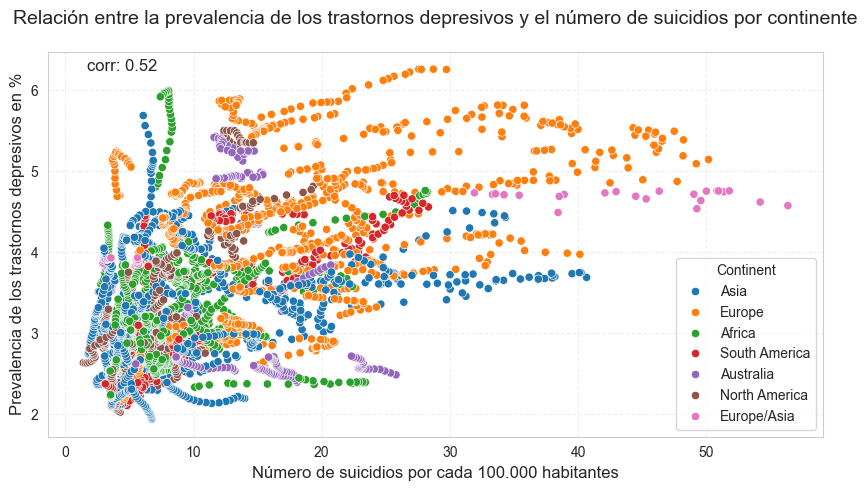

In [487]:
plt.figure(figsize=(10,5))
sns.scatterplot(data= variables,x = "suicidios",y =  "depresion", hue= "Continent")
plt.title("Relación entre la prevalencia de los trastornos depresivos y el número de suicidios por continente",fontsize=14,pad = 20)
plt.xlabel("Número de suicidios por cada 100.000 habitantes",fontsize = 12)
plt.ylabel("Prevalencia de los trastornos depresivos en %",fontsize = 12)
plt.grid(axis = "both",linestyle = "--", alpha=0.3)
plt.annotate(f'corr: {variables["depresion"].corr(variables["suicidios"]):.2f}',xy=(0.05,0.95),xycoords="axes fraction", fontsize = 12)

HIPÓTESIS 3: Periodos con tasas de desempleo más alto coincidirán con tasa más elevadas de suicidios

In [488]:
variables_spain=variables[variables["Country"]== "Spain"]


In [489]:
variables_spain = variables_spain.groupby("año")[["desempleo","depresion","suicidios","sanidad"]].mean()

In [490]:
spain2000 = variables_spain.iloc[:8:]
spain2008 = variables_spain.iloc[8:16:]
spaincrisis = variables_spain.iloc[16::]

In [491]:
spain2000["Franja"]= "1992-2000"
spain2008["Franja"]= "2000-2008"
spaincrisis["Franja"]= "2008-2017"


C:\Users\rafac\AppData\Local\Temp\ipykernel_9412\2756707270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain2000["Franja"]= "1992-2000"
C:\Users\rafac\AppData\Local\Temp\ipykernel_9412\2756707270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain2008["Franja"]= "2000-2008"
C:\Users\rafac\AppData\Local\Temp\ipykernel_9412\2756707270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [492]:
spain = pd.concat((spain2000,spain2008,spaincrisis))
spain

,desempleo,depresion,suicidios,sanidad,Franja
año,,,,,
1992,17.697,4.303,8.910,75.58,1992-2000
1993,22.156,4.283,8.900,76.42,1992-2000
1994,24.209,4.258,8.958,77.26,1992-2000
1995,22.675,4.239,9.094,78.10,1992-2000
1996,22.142,4.232,9.207,78.76,1992-2000
1997,20.698,4.213,9.161,79.42,1992-2000
1998,18.673,4.203,9.151,80.08,1992-2000
1999,15.475,4.181,9.227,80.74,1992-2000
2000,13.785,4.166,9.004,81.40,2000-2008


C:\Users\rafac\AppData\Local\Temp\ipykernel_9412\3223200902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spain,x="Franja",y = "desempleo",palette="Blues",width=0.5,linewidth=2,flierprops={'marker':'o','markersize':8,'markerfacecolor':'none','markeredgecolor':'#34495e'})
C:\Users\rafac\AppData\Local\Temp\ipykernel_9412\3223200902.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spain,x="Franja",y = "suicidios",palette="Reds",width=0.5,linewidth=2,flierprops={'marker':'o','markersize':8,'markerfacecolor':'none','markeredgecolor':'#34495e'})


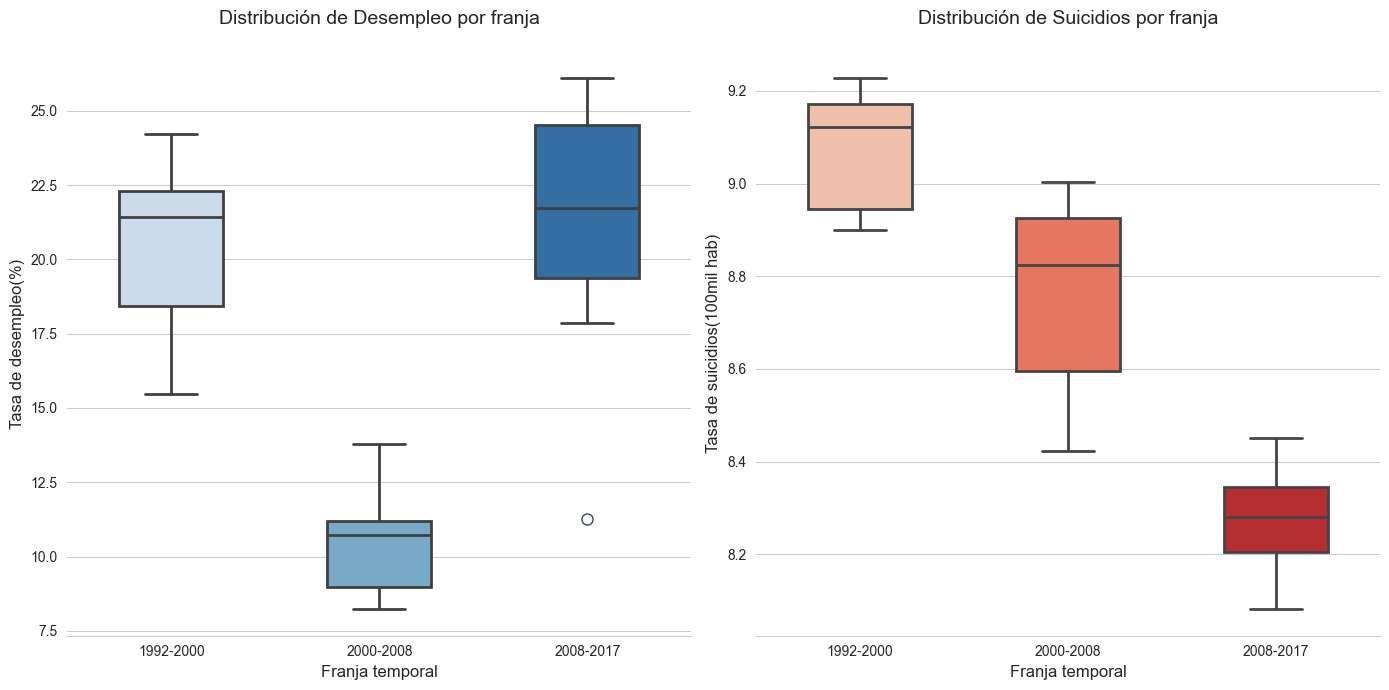

In [493]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.boxplot(data=spain,x="Franja",y = "desempleo",palette="Blues",width=0.5,linewidth=2,flierprops={'marker':'o','markersize':8,'markerfacecolor':'none','markeredgecolor':'#34495e'})
plt.title("Distribución de Desempleo por franja",fontsize = 14,pad=20)
plt.xlabel("Franja temporal",fontsize = 12)
plt.ylabel("Tasa de desempleo(%)",fontsize=12)
sns.despine(left=True)
plt.subplot(1,2,2)
sns.boxplot(data=spain,x="Franja",y = "suicidios",palette="Reds",width=0.5,linewidth=2,flierprops={'marker':'o','markersize':8,'markerfacecolor':'none','markeredgecolor':'#34495e'})
plt.title("Distribución de Suicidios por franja",fontsize = 14,pad=20)
plt.xlabel("Franja temporal",fontsize = 12)
plt.ylabel("Tasa de suicidios(100mil hab)",fontsize=12)
sns.despine(left=True)
plt.tight_layout()

HIPÓTESIS 4 : Paises con tasas de desmpleo  altas serán paises con altas tasas de prevalencia de depresión

In [494]:
variables.groupby("año")["desempleo"].nlargest(2)

año       
1992  104     30.128
      1       30.007
1993  281     30.401
      292     27.700
1994  458     30.366
      469     30.000
1995  646     35.600
      533     31.840
1996  823     38.800
      812     29.837
1997  1000    36.000
      989     29.844
1998  1177    34.500
      1166    29.936
1999  1354    32.400
      1343    30.191
2000  1531    32.200
      1520    30.249
2001  1708    30.520
      1697    30.308
2002  1885    31.940
      1874    30.277
2003  2062    36.690
      2051    30.318
2004  2239    37.161
      2228    30.315
2005  2416    37.320
      2405    30.310
2006  2593    36.392
      2497    31.110
2007  2770    35.231
      2674    28.984
2008  2947    33.930
      2875    26.299
2009  3124    32.351
      3052    26.436
2010  3301    33.135
      3205    27.312
2011  3478    31.502
      3382    27.582
2012  3655    31.096
      3559    28.010
2013  3832    29.017
      3777    27.686
2014  4009    28.215
      3913    27.517
2015  4090    27.695
  

In [495]:
añomax_desempleo = variables[variables["año"]=="2009"]

In [496]:
media_depresion_2002 = añomax_desempleo["depresion"].mean()
media_desempleo_2002 = añomax_desempleo["desempleo"].mean()

In [497]:
añomax_desempleo["desempleo"].nlargest(40).index

Index([3124, 3052, 3028, 3117, 3066, 3152, 3045, 3064, 3141, 3099, 3113, 3151,
       3155, 3095, 3012, 3029, 3145, 3097, 3140, 3075, 3135, 3018, 3170, 3100,
       3010, 3059, 3038, 3169, 3157, 3089, 3183, 3083, 3154, 3081, 3043, 3148,
       3105, 3139, 3162, 3074],
      dtype='int64')

In [498]:
datosg =añomax_desempleo.loc[[x for x in añomax_desempleo["desempleo"].nlargest(50).index],["Country","Continent","depresion","desempleo"]]

In [499]:
datosg =datosg[datosg["Continent"]== "Europe"]

In [500]:
datosg

,Country,Continent,depresion,desempleo
3124,North Macedonia,Europe,2.862,32.351
3028,Bosnia and Herzegovina,Europe,3.054,24.068
3113,Montenegro,Europe,3.166,19.090
3155,Spain,Europe,4.191,17.857
3095,Latvia,Europe,4.743,17.515
3145,Serbia,Europe,3.424,16.116
3100,Lithuania,Europe,5.516,13.785
3010,Albania,Europe,2.533,13.674
3059,Estonia,Europe,5.403,13.548
3083,Ireland,Europe,4.825,12.609


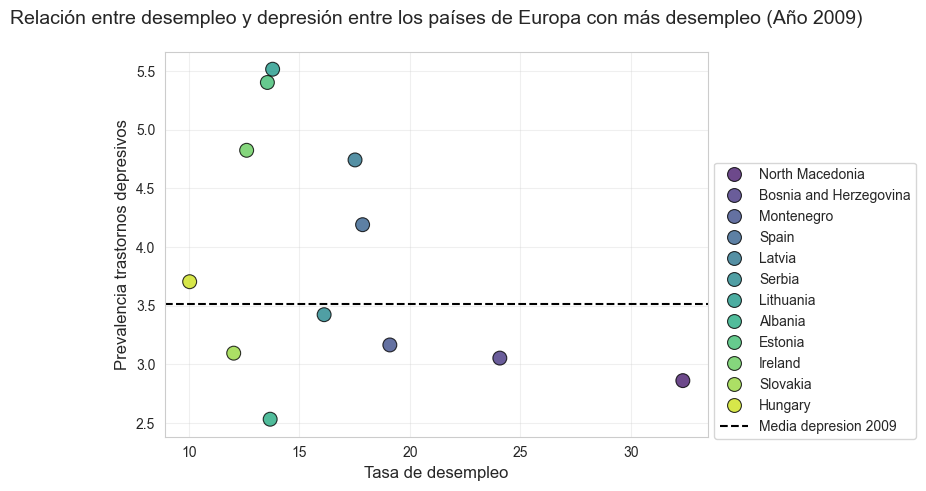

In [501]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.scatterplot(data=datosg,x = "desempleo",y = "depresion",hue= "Country",palette="viridis",s=100,alpha=0.8,edgecolor="black")
plt.axhline(media_depresion_2002,color="k",linestyle="--",label= "Media depresion 2009")
plt.title("Relación entre desempleo y depresión entre los países de Europa con más desempleo (Año 2009)",fontsize=14,pad=20)
plt.xlabel("Tasa de desempleo",fontsize = 12)
plt.ylabel("Prevalencia trastornos depresivos",fontsize = 12)
plt.legend(bbox_to_anchor=(1,0.73))
plt.grid(alpha=0.3)

HIPÓTESIS 5: Los países con menos acceso a la sanidad tendrán datos más altos en prevalencia de trastornos mentales

In [502]:
media_depresion = variables["depresion"].mean()

In [503]:
variables.groupby("Country")["sanidad"].mean().nsmallest(5).index

Index(['Afghanistan', 'Central African Republic', 'Somalia', 'Burundi',
       'Laos'],
      dtype='object', name='Country')

In [504]:
graf_s = variables[variables["Country"].isin(variables.groupby("Country")["sanidad"].mean().nsmallest(5).index)]

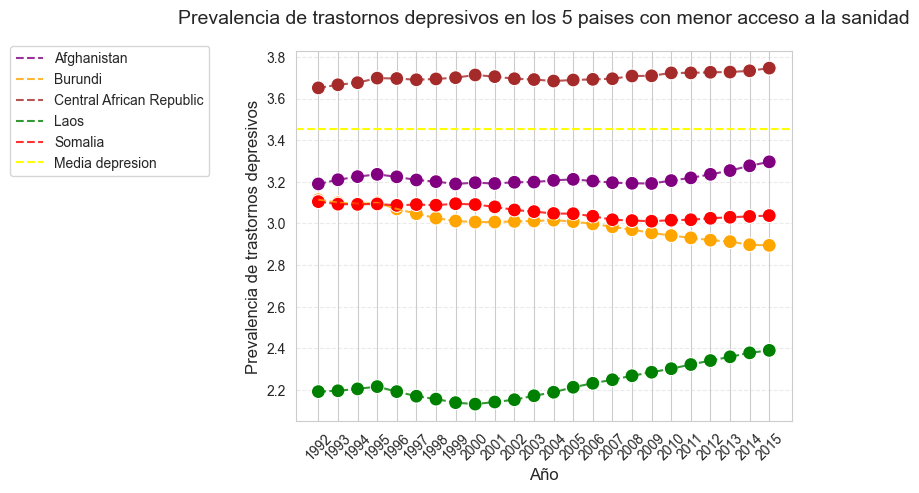

In [506]:
lista_colores2 = ["purple","orange","brown","green","red"]
sns.scatterplot(data = graf_s,x = "año",y = "depresion",hue = "Country", palette = lista_colores2,legend=False, s = 100,)
sns.lineplot(data = graf_s,x = "año",y = "depresion",hue = "Country", palette = lista_colores2,linestyle="--",linewidth = 1.5,alpha =0.8)
plt.axhline(media_depresion,color="yellow",linestyle="--",label= "Media depresion")
plt.legend(bbox_to_anchor=(-0.16,1.033))
plt.title("Prevalencia de trastornos depresivos en los 5 paises con menor acceso a la sanidad",fontsize = 14, pad = 20)
plt.grid(axis ="y", linestyle= '--',alpha = 0.4)
plt.xticks(rotation=45,fontsize=10)
plt.xlabel("Año",fontsize=12)
plt.ylabel("Prevalencia de trastornos depresivos",fontsize = 12);


POR ÚLTIMO VER CÓMO SE RELACIONAN ENTRE SI LAS VARIABLES MÁS IMPORTANTES

In [352]:
varinteres = variables.drop(columns={"Population","personas depresion","total personas continente","peso_ponderacion","depresion ponderada","porcentaje depresion","suicidios totales"})

In [ ]:
matriz_correlaciones = varinteres.corr(numeric_only=True)
matriz_correlaciones

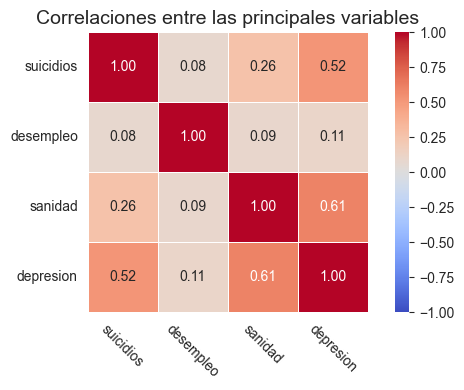

In [357]:
plt.figure(figsize=(6,4))
sns.heatmap(data= matriz_correlaciones,annot=True,fmt=".2f",cmap="coolwarm",vmin=-1,vmax= 1,linewidths=0.5,square=True)
plt.title("Correlaciones entre las principales variables",fontsize =14)
plt.xticks(rotation=-45)
plt.yticks(rotation=0)
plt.tight_layout()